# Chapter 9. Mathematical Tools

* 싸이지먼트 금융공학Py : Python for Finance: Analyze Big Financial Data [1, 2]
* 발표자 : 김무성

# 차례

* Approximation
* Convex Optimization
* Integration
* Symbolic Computation
* Conclusions

<font color="red">Since the arrival of the so-called Rocket Scientists on Wall Street in the '80s and '90s finance has evolved into a discipline of applied mathematics</font>

# Approximation

* Regression
* Interpolation

Regression and interpolation are among the most often used numerical techniques in finace.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

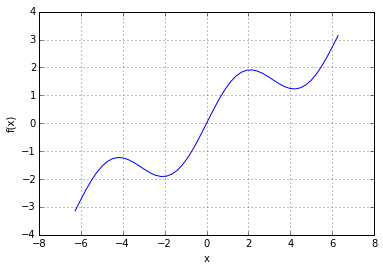

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot
# title: Example function plot
# size: 60

## Regression

* Monomials as Basis Functions
* Individual Basis Functions
* Noisy Data
* Unsorted data
* Multiple dimensions

#### Equation 9-1. Minimization problem of regression

<img src="figures/eq9.1.png" width=600 />

<img src="figures/tbl9.1.png" width=600 />

### Monomials as Basis Functions

In [6]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

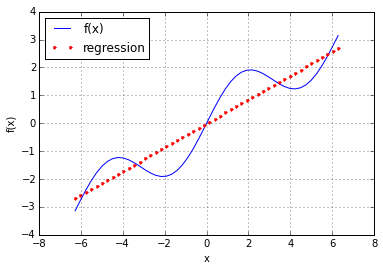

In [7]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_1
# title: Example function and linear regression
# size: 60

In [8]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

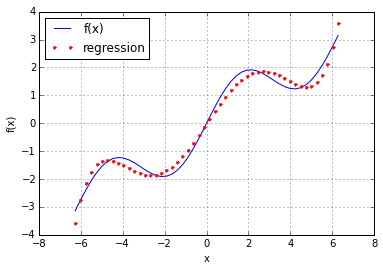

In [9]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_2
# title: Regression with monomials up to order 5
# size: 60

In [10]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

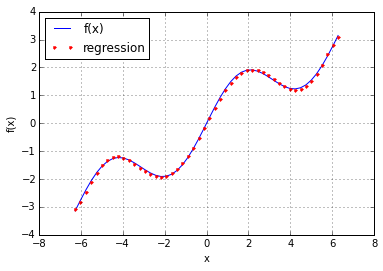

In [11]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_3
# title: Regression with monomials up to order 7
# size: 60

In [12]:
np.allclose(f(x), ry)

False

In [13]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517483

### Individual Basis Functions

In [14]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [15]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [16]:
reg

array([  3.73659739e-16,   5.62777448e-01,   0.00000000e+00,
        -5.43553615e-03])

In [17]:
ry = np.dot(reg, matrix)

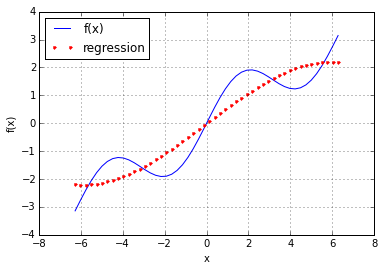

In [18]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_4
# title: Regression via least-squares function
# size: 60

In [19]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

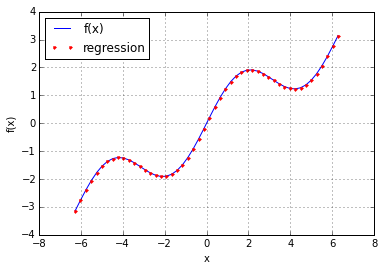

In [20]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_5
# title: Regression using individual functions
# size: 60

In [21]:
np.allclose(f(x), ry)

True

In [22]:
np.sum((f(x) - ry) ** 2) / len(x)

8.6938018433595335e-31

In [23]:
reg

array([  3.73659739e-16,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

### Noisy Data

In [24]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [25]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

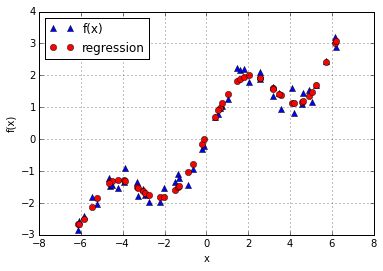

In [26]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_6
# title: Regression with noisy data
# size: 60

### Unsorted data

In [27]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [28]:
print xu[:10].round(2)
print yu[:10].round(2)

[ 0.04 -0.86 -0.01 -1.4   0.37 -3.09 -0.43  4.11  5.19  0.21]
[ 0.06 -1.19 -0.02 -1.68  0.54 -1.6  -0.63  1.23  1.7   0.32]


In [29]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

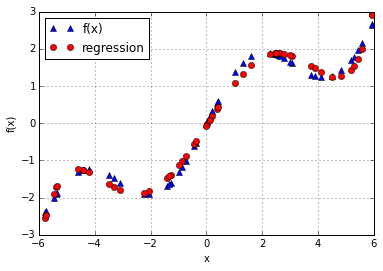

In [30]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_7
# title: Regression with unsorted data
# size: 60

### Multiple dimensions

In [31]:
def fm((x, y)):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [32]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

<matplotlib.colorbar.Colorbar instance at 0x10ef4df80>

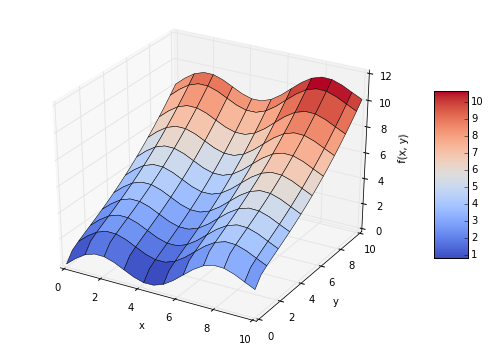

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_1
# title: Function with two parameters
# size: 60

In [34]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [37]:
import statsmodels.api as sm

In [38]:
model = sm.OLS(fm((x, y)), matrix).fit()

In [39]:
model.rsquared

1.0

In [40]:
a = model.params
a

array([  6.16173779e-15,   2.50000000e-01,   1.02695630e-15,
        -1.16226473e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [41]:
def reg_func(a, (x, y)):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

In [42]:
RZ = reg_func(a, (X, Y))

<matplotlib.colorbar.Colorbar instance at 0x112d14518>

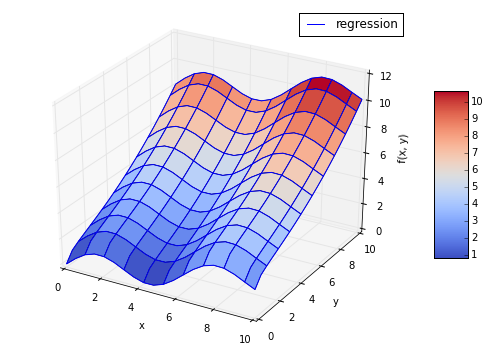

In [43]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_2
# title: Higher dimension regression
# size: 60

## Interpolation

<img src="figures/tbl9.2.png" width=600 />

<img src="figures/tbl9.3-1.png" width=600 />
<img src="figures/tbl9.3-2.png" width=600 />

In [44]:
import scipy.interpolate as spi

In [45]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [46]:
def f(x):
    return np.sin(x) + 0.5 * x

In [47]:
ipo = spi.splrep(x, f(x), k=1)

In [48]:
iy = spi.splev(x, ipo)

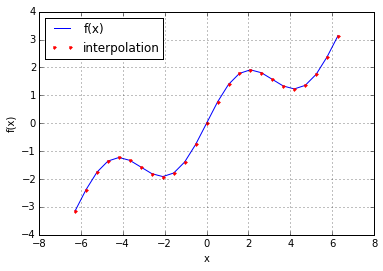

In [49]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_1
# title: Example plot with linear interpolation
# size: 60

In [50]:
np.allclose(f(x), iy)

True

In [51]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

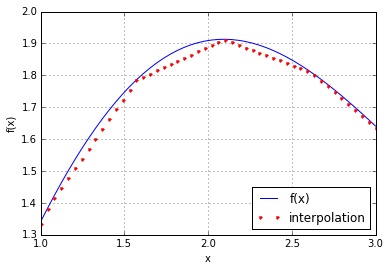

In [52]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_2
# title: Example plot (detail) with linear interpolation
# size: 60

In [53]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

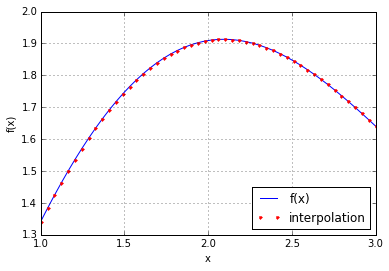

In [54]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_3
# title: Example plot (detail) with cubic splines interpolation
# size: 60

In [55]:
np.allclose(f(xd), iyd)

False

In [56]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08

# Convex Optimization

* Global Optimization
* Local Optimization
* Constrained Optimization

A number of financial disciplies need tools for convex optimization (e.g., optoin pricing when it comes to model calibation).

In [57]:
def fm((x, y)):
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [58]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

<matplotlib.colorbar.Colorbar instance at 0x113230050>

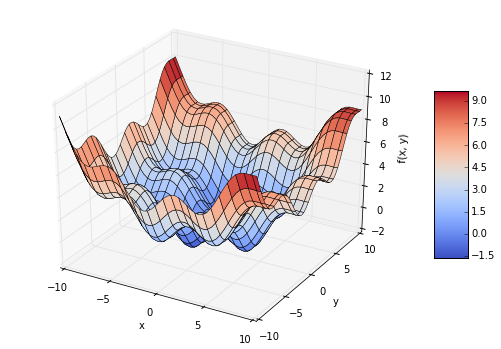

In [59]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: opt_plot_3d
# title: Function to minimize with two parameters
# size: 60

In [60]:
import scipy.optimize as spo

## Global Optimization

In [61]:
def fo((x, y)):
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print '%8.4f %8.4f %8.4f' % (x, y, z)
    return z

In [62]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [63]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [64]:
fm(opt1)

-1.7748994599769203

## Local Optimization

In [65]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [66]:
fm(opt2)

-1.7757246992239009

In [67]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

## Constrained Optimization

<img src="figures/eq9.2.png" width=600 />
<img src="figures/eq9.3.png" width=600 />

In [68]:
# function to be minimized
from math import sqrt
def Eu((s, b)):
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints
cons = ({'type': 'ineq', 'fun': lambda (s, b):  100 - s * 10 - b * 10})
  # budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough

In [69]:
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [70]:
result

  status: 0
 success: True
    njev: 5
    nfev: 21
     fun: -9.700883611487832
       x: array([ 8.02547122,  1.97452878])
 message: 'Optimization terminated successfully.'
     jac: array([-0.48508096, -0.48489535,  0.        ])
     nit: 5

In [71]:
result['x']

array([ 8.02547122,  1.97452878])

In [72]:
-result['fun']

9.700883611487832

In [73]:
np.dot(result['x'], [10, 10])

99.999999999999986

# Integration

* Numerical Integration
* Integration by Simulation

In particular, the valuation of financial (derivate) assets often boild down to the evaluation of integrals.

<img src="figures/eq9.4.png" width=600 />

In [74]:
import scipy.integrate as sci

In [75]:
def f(x):
    return np.sin(x) + 0.5 * x

In [76]:
a = 0.5  # left integral limit
b = 9.5  # right integral limit
x = np.linspace(0, 10)
y = f(x)

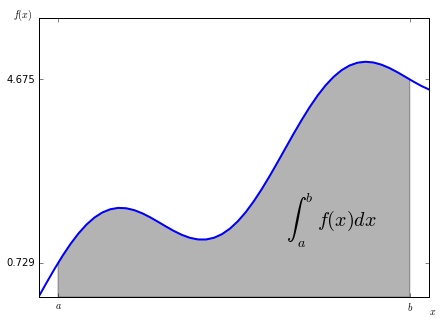

In [77]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])
# tag: sin_integral
# title: Example function with integral area
# size: 50

## Numerical Integration

In [78]:
sci.fixed_quad(f, a, b)[0]

24.366995967084588

In [79]:
sci.quad(f, a, b)[0]

24.374754718086752

In [80]:
sci.romberg(f, a, b)

24.374754718086713

In [81]:
xi = np.linspace(0.5, 9.5, 25)

In [82]:
sci.trapz(f(xi), xi)

24.352733271544516

In [83]:
sci.simps(f(xi), xi)

24.374964184550748

## Integration by Simulation

In [84]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print np.sum(f(x)) / len(x) * (b - a)

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


# Symbolic Computation

* Basics
* Equations
* Integration
* Differentiation

Python provides with Sympy a powerful tool for symbolic mathematics, e.g., to solve (sysems of) equations.

In [86]:
import sympy as sy

## Basics

In [87]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [88]:
type(x)

sympy.core.symbol.Symbol

In [89]:
sy.sqrt(x)

sqrt(x)

In [90]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [91]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [92]:
sy.simplify(f)

1.5*x**2 + 4

In [93]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [94]:
print sy.pretty(f)

     2    
1.5*x  + 4


In [95]:
print sy.pretty(sy.sqrt(x) + 0.5)

  ___      
\/ x  + 0.5


In [96]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [97]:
pi_str[-40:]

'8245672736856312185020980470362464176198'

In [98]:
pi_str.find('111272')

366713

## Equations

In [99]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [100]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [101]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [102]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

## Integration

In [103]:
a, b = sy.symbols('a b')

In [104]:
print sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b)))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [105]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)

In [106]:
print sy.pretty(int_func)

      2         
0.25*x  - cos(x)


In [107]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [108]:
Fb - Fa  # exact value of integral

24.3747547180867

In [109]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print sy.pretty(int_func_limits)

           2         2                  
- - -0.25*a  + 0.25*b  + cos(a) - cos(b)


In [110]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

24.3747547180868

In [111]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180868

## Differentiation

In [112]:
int_func.diff()

0.5*x + sin(x)

In [113]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)

In [114]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [115]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [116]:
xo = sy.nsolve(del_x, -1.5)
xo

mpf('-1.4275517787645941')

In [117]:
yo = sy.nsolve(del_y, -1.5)
yo

mpf('-1.4275517787645941')

In [118]:
f.subs({x : xo, y : yo}).evalf() 
  # global minimum

-1.77572565314742

In [119]:
xo = sy.nsolve(del_x, 1.5)
xo

mpf('1.7463292822528528')

In [120]:
yo = sy.nsolve(del_y, 1.5)
yo

mpf('1.7463292822528528')

In [121]:
f.subs({x : xo, y : yo}).evalf()
  # local minimum

2.27423381055640

# Conclusions

# 참고문헌

* [1] 교재 : Python for Finance: Analyze Big Financial Data - http://www.amazon.com/Python-Finance-Analyze-Financial-Data/dp/1491945281
* [2] 저자 코드 - https://github.com/yhilpisch/py4fi